In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

## Data processing

In [2]:
glob.glob("../../datasets/*bot2bot.tsv")

['../../datasets/enwiki_20161201_reverted_bot2bot.tsv',
 '../../datasets/zhwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/frwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/jawiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/eswiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/ptwiki_20161001_reverted_bot2bot.tsv',
 '../../datasets/dewiki_20161001_reverted_bot2bot.tsv']

In [3]:
df_dict = {}
for filename in glob.glob("../../datasets/*bot2bot.tsv"):
    lang_code = filename[15:17]
    df_dict[lang_code] = pd.read_csv(filename, sep="\t")

In [4]:
for lang, lang_df in df_dict.items():
    print(lang, len(lang_df))

fr 193066
es 177368
pt 141738
ja 89980
de 137844
en 1001093
zh 102846


In [5]:
df_dict['en'][0:2].transpose()

,0,1
rev_id,273691771,136526894
rev_timestamp,20090227173507,20070607044209
rev_user,6505923,4534303
rev_user_text,Kbdankbot,PbBot
rev_page,5040439,3046554
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55
rev_minor_edit,False,False
rev_deleted,False,False
rev_parent_id,2.59117e+08,1.20932e+08
archived,False,False


### Combining into one dataframe

In [6]:
df_all = df_dict['en'].copy()
df_all = df_all.drop(df_all.index, axis=0)

for lang, lang_df in df_dict.items():
    lang_df['language'] = lang
    df_all = pd.concat([df_all, lang_df])

In [7]:
df_all['language'].value_counts()

en    1001093
fr     193066
es     177368
pt     141738
de     137844
zh     102846
ja      89980
Name: language, dtype: int64

In [8]:
for lang, lang_df in df_dict.items():
    print(lang, len(lang_df))
    


fr 193066
es 177368
pt 141738
ja 89980
de 137844
en 1001093
zh 102846


### Namespace type

In [9]:
def namespace_type(item):
    if int(item) == 0:
        return 'article'
    elif int(item) == 14:
        return 'category'
    elif int(item) % 2 == 1:
        return 'other talk'
    else:
        return 'other page'

In [10]:
df_all['namespace_type'] = df_all['page_namespace'].apply(namespace_type)

In [11]:
df_all['namespace_type'].value_counts()

article       1122392
category       365193
other page     226994
other talk     129356
Name: namespace_type, dtype: int64

### Datetime parsing

In [12]:
def get_year(timestamp):
    return timestamp.year

In [13]:
df_all['reverting_timestamp_dt'] = pd.to_datetime(df_all['reverting_timestamp'], format="%Y%m%d%H%M%S")
df_all['reverted_timestamp_dt'] = pd.to_datetime(df_all['rev_timestamp'], format="%Y%m%d%H%M%S")

df_all = df_all.set_index('reverting_timestamp_dt')

df_all['reverting_timestamp_dt'] = pd.to_datetime(df_all['reverting_timestamp'], format="%Y%m%d%H%M%S")

df_all['time_to_revert'] = df_all['reverting_timestamp_dt']-df_all['reverted_timestamp_dt']

df_all['time_to_revert_hrs'] = df_all['time_to_revert'].astype('timedelta64[s]')/(60*60)

df_all['time_to_revert_days'] = df_all['time_to_revert'].astype('timedelta64[s]')/(60*60*24)

df_all['reverting_year'] = df_all['reverting_timestamp_dt'].apply(get_year)

In [14]:
df_all[df_all['language']=='en'].reverting_year.value_counts().sort_index()

2004         4
2005       262
2006      6238
2007     34084
2008     66228
2009     72846
2010     61780
2011    126814
2012     96084
2013    403111
2014     41188
2015     49194
2016     43260
Name: reverting_year, dtype: int64

In [15]:
df_all.reverting_year.value_counts().sort_index()

2004       604
2005      3196
2006     12714
2007     58850
2008    109978
2009    163096
2010    137000
2011    294004
2012    206238
2013    685235
2014     53466
2015     70826
2016     48728
Name: reverting_year, dtype: int64

### Final data format

In [16]:
df_all[0:2].transpose()

reverting_timestamp_dt,2013-03-02 20:33:29,2011-10-04 21:53:28
archived,False,False
language,fr,fr
page_namespace,0,0
rev_deleted,False,False
rev_id,88656915,70598552
rev_minor_edit,True,True
rev_page,4419903,412311
rev_parent_id,8.85978e+07,6.75069e+07
rev_revert_offset,1,1
rev_sha1,lgtqatftj6rma9ezkyy56rsqethdoqf,0zw28ur2rlxg207ms6w3krqd4qzozq3


## Descriptive statistics

### Number of bot-bot reverts per language over time

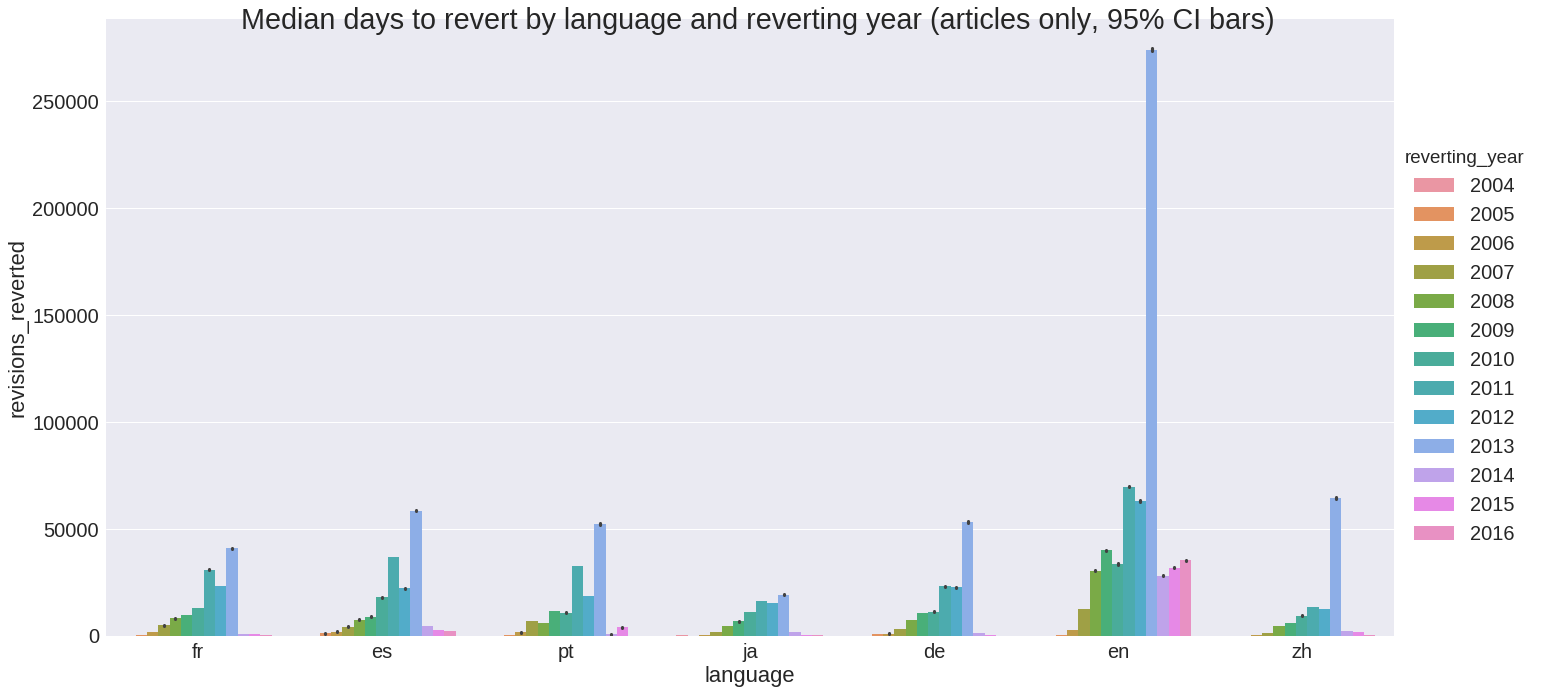

In [19]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='revisions_reverted',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.sum,                   
                   size=10,
                   aspect = 2)

plt.suptitle("Median days to revert by language and reverting year (articles only, 95% CI bars)")

In [68]:
gb = df_all[df_all['page_namespace']==0].groupby(["language","reverting_year"])

In [102]:
sns.set(font_scale=1.5)
gb['revisions_reverted'].sum().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
reverting_year,,,,,,,
2004,24.0,4.0,NaN,4.0,578.0,2.0,12.0
2005,858.0,312.0,1080.0,474.0,58.0,434.0,48.0
2006,1032.0,2796.0,1964.0,1602.0,246.0,1560.0,406.0
2007,3268.0,12560.0,4218.0,4864.0,1896.0,6780.0,1314.0
2008,7336.0,30352.0,7556.0,8146.0,4740.0,6070.0,4432.0
2009,10680.0,40100.0,8906.0,9772.0,6724.0,11506.0,5886.0
2010,11300.0,33600.0,17942.0,12906.0,11142.0,10810.0,9486.0
2011,23234.0,69780.0,36886.0,30982.0,16316.0,32650.0,13480.0
2012,22746.0,63150.0,22144.0,23310.0,15258.0,18620.0,12578.0


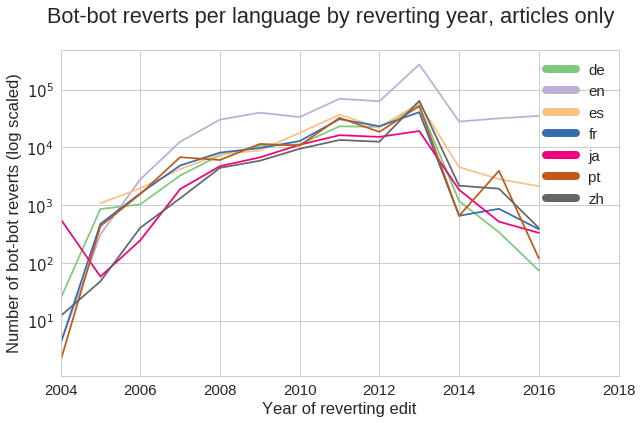

In [110]:
sns.set_style("whitegrid")

groupby_unstack = gb['revisions_reverted'].sum().unstack().transpose()
ax = groupby_unstack.plot(kind='line', logy=True, figsize=[10,6], colormap="Accent")    

plt.xlim(2004,2018)

plt.ylabel("Number of bot-bot reverts (log scaled)")
plt.xlabel("Year of reverting edit")
plt.suptitle("Bot-bot reverts per language by reverting year, articles only")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

In [114]:
gb_lang_nstype = df_all.groupby(["language", "namespace_type"])

gb_lang_nstype['revisions_reverted'].sum().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
namespace_type,,,,,,,
article,135386,622210,168836,134842,78910,145424,116574
category,32760,385732,75312,73864,41162,39330,19226
other page,5066,350596,5304,2340,1522,2478,6488
other talk,15132,142848,108,42014,58,736,582


In [124]:
gb_lang_nstype['revisions_reverted'].sum().unstack().transpose().sum()

language
de     188344
en    1501386
es     249560
fr     253060
ja     121652
pt     187968
zh     142870
dtype: int64

In [120]:
gb_lang_nstype['revisions_reverted'].sum().unstack().sum()

namespace_type
article       1402182
category       667386
other page     373794
other talk     201478
dtype: int64

In [122]:
gb_lang_nstype['revisions_reverted'].sum().unstack().sum().sum()

2644840

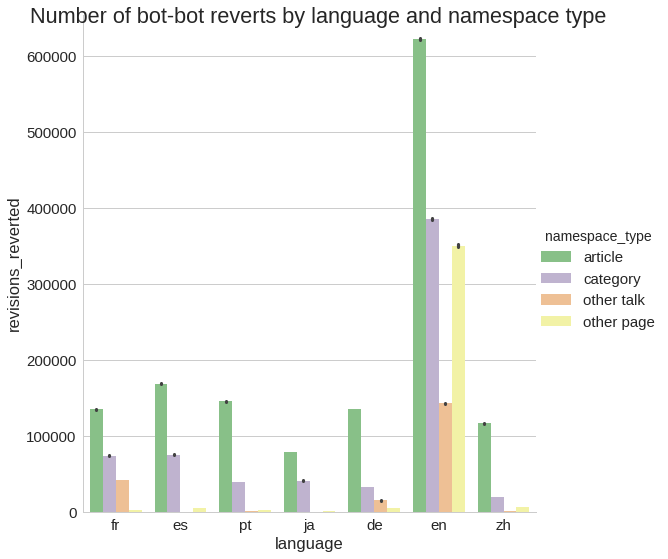

In [129]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

g = sns.factorplot(data=df_all,
                   x='language',
                   y='revisions_reverted',
                   hue='namespace_type',
                   kind='bar',
                   estimator=np.sum,                   
                   size=8,
                   palette="Accent",
                   aspect = 1)

plt.suptitle("Number of bot-bot reverts by language and namespace type")

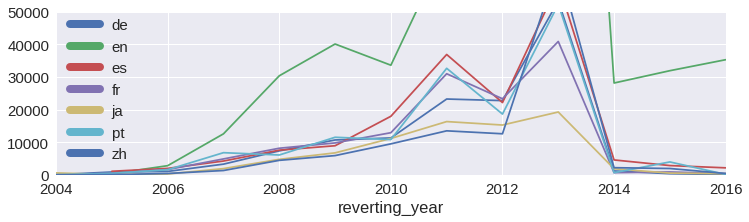

In [73]:
gb['revisions_reverted'].sum().unstack().transpose().plot(kind='line', figsize=[12,3])    

plt.ylim(0,50000)

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

In [50]:
monthly_counts = gb['revisions_reverted'].sum().unstack().transpose()

/home/staeiou/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


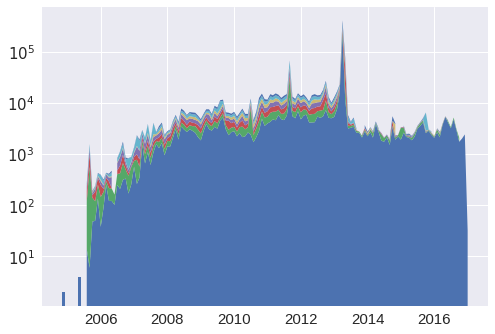

In [59]:
ax = plt.stackplot(monthly_counts.index,
              monthly_counts.en,
              monthly_counts.es,
              monthly_counts.de,
              monthly_counts.fr,
              monthly_counts.ja,
              monthly_counts.pt,
              monthly_counts.zh)

plt.yscale('log')

plt.legend()